In [1]:
import os
# Enforces CPU-only execution of torch
os.environ["CUDA_VISIBLE_DEVICES"] = ""

# Configure environment to ensure single-threaded execution.
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"]= "1"
os.environ["OMP_NUM_THREADS"] = "1"

import torch
torch.set_num_threads(1)

from xtr.datasets import BEIR, BEIRDataset, LoTTE, LoTTEDataset
from xtr.config import XTRConfig, XTRModel, XTRScaNNIndexConfig, XTRBruteForceIndexConfig, XTRFAISSIndexConfig
from xtr.utils import xtr_tracker, canonical_index_name
from xtr.modeling.xtr import XTR

import json
from datetime import datetime

/future/u/scheerer/miniconda3/envs/xtr-eval/lib/python3.8/site-packages/beir/util.py:2: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [6]:
NUM_QUERIES = 5
DOCUMENT_TOP_K = 100
TOKEN_TOP_K = 40_000

In [2]:
dataset = LoTTEDataset(dataset=LoTTE.LIFESTYLE, datasplit="test")
index_config = XTRScaNNIndexConfig()
index_name = canonical_index_name(dataset=dataset, index_config=index_config)
config = XTRConfig(index_name=index_name, model=XTRModel.BASE_EN, index_config=index_config, override=False)

xtr = XTR(config=config, collection=dataset.collection, device=torch.device("cpu"))

#> Loading collection from /lfs/1/scheerer/datasets/lotte/lotte/lifestyle/test/collection.tsv ...
0M 
#> Loading the queries from /lfs/1/scheerer/datasets/lotte/lotte/lifestyle/test/questions.search.tsv ...
#> Got 661 queries. All QIDs are unique.
Loading existing index from /future/u/scheerer/home/data/xtr-eval/indexes/LoTTE.LIFESTYLE.search.split=test.XTRIndexType.SCANN.


[libprotobuf WARNING external/com_google_protobuf/src/google/protobuf/text_format.cc:339] Warning parsing text-format research_scann.ScannConfig: 38:5: text format contains deprecated field "min_cluster_size"


In [4]:
from xtr.data.queries import Queries
queries_test = Queries.cast(list(map(lambda x: x[1], dataset.queries))[:NUM_QUERIES])

In [5]:
from xtr.utils.tracker import ExecutionTracker

groups = {
    "Candidate Generation": ["search_batched", "enumerate_scores"],
    "Aggregate Scores": ["get_did2scores", "add_ems", "get_final_score", "sort_scores"]
}

tracker = ExecutionTracker(name=index_name, steps=["Query Encoding", "search_batched", "enumerate_scores", "Estimate Missing Similarity",
                                                   "get_did2scores", "add_ems", "get_final_score", "sort_scores"])
rankings = xtr.retrieve_docs(queries_test, document_top_k=DOCUMENT_TOP_K, token_top_k=TOKEN_TOP_K, tracker=tracker)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:13<00:00,  2.73s/it]


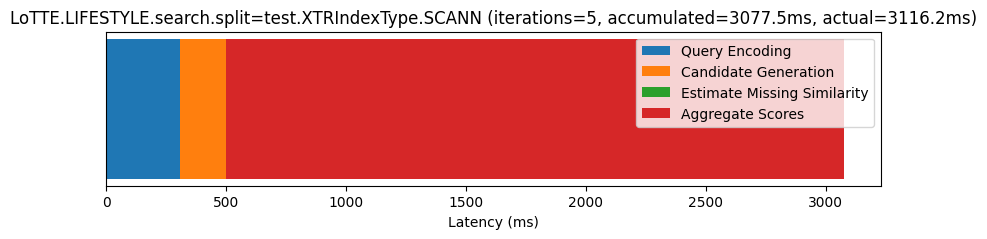

In [6]:
tracker.display_grouped(groups, detailed=False)

In [3]:
from xtr.modeling.xtr_opt import XTROpt

xtr_opt = XTROpt(config=config, collection=dataset.collection, device=torch.device("cpu"))

Loading existing index from /future/u/scheerer/home/data/xtr-eval/indexes/LoTTE.LIFESTYLE.search.split=test.XTRIndexType.SCANN.


[libprotobuf WARNING external/com_google_protobuf/src/google/protobuf/text_format.cc:339] Warning parsing text-format research_scann.ScannConfig: 38:5: text format contains deprecated field "min_cluster_size"
100%|████████████████████████████████████████████████████████████████████████████████████| 23713178/23713178 [01:39<00:00, 237419.74it/s]


In [7]:
from xtr.utils.tracker import ExecutionTracker
tracker_opt = ExecutionTracker(name=index_name, steps=["Query Encoding", "search_batched", "enumerate_scores", "Estimate Missing Similarity",
                                                   "get_did2scores", "add_ems", "get_final_score", "sort_scores"])
rankings_opt = xtr_opt.retrieve_docs(dataset.queries, document_top_k=DOCUMENT_TOP_K, token_top_k=TOKEN_TOP_K, tracker=tracker_opt)

  0%|▏                                                                                                   | 1/661 [00:00<06:00,  1.83it/s]

hi


  0%|▎                                                                                                   | 2/661 [00:01<05:37,  1.95it/s]

hi


  0%|▍                                                                                                   | 3/661 [00:01<05:23,  2.03it/s]

hi
hi


  1%|▊                                                                                                   | 5/661 [00:02<04:55,  2.22it/s]

hi


  1%|▉                                                                                                   | 6/661 [00:02<04:51,  2.25it/s]

hi


  1%|█                                                                                                   | 7/661 [00:03<04:21,  2.50it/s]

hi


  1%|█▏                                                                                                  | 8/661 [00:03<04:24,  2.47it/s]

hi


  1%|█▎                                                                                                  | 9/661 [00:03<03:56,  2.76it/s]

hi


  2%|█▍                                                                                                 | 10/661 [00:04<03:43,  2.91it/s]

hi


  2%|█▋                                                                                                 | 11/661 [00:04<03:44,  2.90it/s]

hi


  2%|█▊                                                                                                 | 12/661 [00:04<03:33,  3.05it/s]

hi


  2%|█▉                                                                                                 | 13/661 [00:05<03:43,  2.90it/s]

hi


  2%|██                                                                                                 | 14/661 [00:05<03:55,  2.75it/s]

hi


  2%|██▏                                                                                                | 15/661 [00:05<03:46,  2.85it/s]

hi


  2%|██▍                                                                                                | 16/661 [00:06<04:00,  2.68it/s]

hi


  3%|██▌                                                                                                | 17/661 [00:06<04:31,  2.37it/s]

hi


  3%|██▋                                                                                                | 18/661 [00:07<04:13,  2.54it/s]

hi


  3%|██▊                                                                                                | 19/661 [00:07<04:02,  2.65it/s]

hi


  3%|██▉                                                                                                | 20/661 [00:07<03:51,  2.77it/s]

hi


  3%|███▏                                                                                               | 21/661 [00:08<03:56,  2.70it/s]

hi


  3%|███▎                                                                                               | 22/661 [00:08<03:51,  2.76it/s]

hi


  3%|███▍                                                                                               | 23/661 [00:08<03:51,  2.76it/s]

hi


  4%|███▌                                                                                               | 24/661 [00:09<03:48,  2.79it/s]

hi


  4%|███▋                                                                                               | 25/661 [00:09<03:36,  2.93it/s]

hi


  4%|███▉                                                                                               | 26/661 [00:09<03:32,  2.99it/s]

hi


  4%|████                                                                                               | 27/661 [00:10<03:32,  2.99it/s]

hi


  4%|████▏                                                                                              | 28/661 [00:10<03:30,  3.00it/s]

hi


  4%|████▎                                                                                              | 29/661 [00:10<03:37,  2.91it/s]

hi


  5%|████▍                                                                                              | 30/661 [00:11<03:42,  2.84it/s]

hi


  5%|████▋                                                                                              | 31/661 [00:11<03:38,  2.88it/s]

hi


  5%|████▊                                                                                              | 32/661 [00:12<03:47,  2.77it/s]

hi


  5%|████▉                                                                                              | 33/661 [00:12<03:33,  2.94it/s]

hi


  5%|█████                                                                                              | 34/661 [00:12<03:21,  3.12it/s]

hi


  5%|█████▏                                                                                             | 35/661 [00:12<03:18,  3.16it/s]

hi


  5%|█████▍                                                                                             | 36/661 [00:13<03:30,  2.97it/s]

hi


  6%|█████▌                                                                                             | 37/661 [00:13<03:49,  2.71it/s]

hi


  6%|█████▋                                                                                             | 38/661 [00:14<03:39,  2.84it/s]

hi


  6%|█████▊                                                                                             | 39/661 [00:14<03:51,  2.69it/s]

hi


  6%|█████▉                                                                                             | 40/661 [00:14<03:50,  2.69it/s]

hi


  6%|██████▏                                                                                            | 41/661 [00:15<03:51,  2.68it/s]

hi


  6%|██████▎                                                                                            | 42/661 [00:15<03:39,  2.82it/s]

hi


  7%|██████▍                                                                                            | 43/661 [00:15<03:26,  2.99it/s]

hi


  7%|██████▌                                                                                            | 44/661 [00:16<03:08,  3.27it/s]

hi


  7%|██████▋                                                                                            | 45/661 [00:16<03:03,  3.36it/s]

hi


  7%|██████▉                                                                                            | 46/661 [00:16<03:03,  3.35it/s]

hi


  7%|███████                                                                                            | 47/661 [00:17<03:30,  2.91it/s]

hi


  7%|███████▏                                                                                           | 48/661 [00:17<03:28,  2.94it/s]

hi


  7%|███████▎                                                                                           | 49/661 [00:17<03:36,  2.83it/s]

hi


  8%|███████▍                                                                                           | 50/661 [00:18<03:28,  2.93it/s]

hi


  8%|███████▋                                                                                           | 51/661 [00:18<03:19,  3.05it/s]

hi


  8%|███████▊                                                                                           | 52/661 [00:18<03:06,  3.27it/s]

hi


  8%|███████▉                                                                                           | 53/661 [00:19<03:18,  3.06it/s]

hi


  8%|████████                                                                                           | 54/661 [00:19<03:10,  3.19it/s]

hi


  8%|████████▏                                                                                          | 55/661 [00:19<03:25,  2.94it/s]

hi


  8%|████████▍                                                                                          | 56/661 [00:20<03:21,  3.00it/s]

hi


  9%|████████▌                                                                                          | 57/661 [00:20<03:26,  2.93it/s]

hi


  9%|████████▋                                                                                          | 58/661 [00:20<03:13,  3.12it/s]

hi


  9%|████████▊                                                                                          | 59/661 [00:20<03:08,  3.20it/s]

hi


  9%|████████▉                                                                                          | 60/661 [00:21<03:15,  3.07it/s]

hi


  9%|█████████▏                                                                                         | 61/661 [00:21<03:17,  3.04it/s]

hi


  9%|█████████▎                                                                                         | 62/661 [00:22<03:39,  2.73it/s]

hi


 10%|█████████▍                                                                                         | 63/661 [00:22<03:23,  2.94it/s]

hi


 10%|█████████▌                                                                                         | 64/661 [00:22<03:18,  3.01it/s]

hi


 10%|█████████▋                                                                                         | 65/661 [00:22<03:11,  3.11it/s]

hi


 10%|█████████▉                                                                                         | 66/661 [00:23<03:14,  3.06it/s]

hi


 10%|██████████                                                                                         | 67/661 [00:23<03:13,  3.07it/s]

hi


 10%|██████████▏                                                                                        | 68/661 [00:23<03:00,  3.29it/s]

hi


 10%|██████████▎                                                                                        | 69/661 [00:24<03:14,  3.05it/s]

hi


 11%|██████████▍                                                                                        | 70/661 [00:24<03:06,  3.17it/s]

hi


 11%|██████████▋                                                                                        | 71/661 [00:24<02:59,  3.28it/s]

hi


 11%|██████████▊                                                                                        | 72/661 [00:25<02:52,  3.41it/s]

hi


 11%|██████████▉                                                                                        | 73/661 [00:25<03:02,  3.23it/s]

hi


 11%|███████████                                                                                        | 74/661 [00:25<02:57,  3.30it/s]

hi


 11%|███████████▏                                                                                       | 75/661 [00:26<03:13,  3.03it/s]

hi


 11%|███████████▍                                                                                       | 76/661 [00:26<02:57,  3.30it/s]

hi


 12%|███████████▌                                                                                       | 77/661 [00:26<03:12,  3.03it/s]

hi


 12%|███████████▋                                                                                       | 78/661 [00:27<03:27,  2.81it/s]

hi


 12%|███████████▊                                                                                       | 79/661 [00:27<03:16,  2.96it/s]

hi


 12%|███████████▉                                                                                       | 80/661 [00:27<03:04,  3.15it/s]

hi


 12%|████████████▏                                                                                      | 81/661 [00:28<02:57,  3.27it/s]

hi


 12%|████████████▎                                                                                      | 82/661 [00:28<03:02,  3.17it/s]

hi


 13%|████████████▍                                                                                      | 83/661 [00:28<02:51,  3.36it/s]

hi


 13%|████████████▌                                                                                      | 84/661 [00:28<02:43,  3.53it/s]

hi


 13%|████████████▋                                                                                      | 85/661 [00:29<02:59,  3.21it/s]

hi


 13%|████████████▉                                                                                      | 86/661 [00:29<02:52,  3.33it/s]

hi


 13%|█████████████                                                                                      | 87/661 [00:29<02:44,  3.49it/s]

hi


 13%|█████████████▏                                                                                     | 88/661 [00:30<02:44,  3.49it/s]

hi


 13%|█████████████▎                                                                                     | 89/661 [00:30<03:04,  3.10it/s]

hi


 14%|█████████████▍                                                                                     | 90/661 [00:30<03:17,  2.90it/s]

hi


 14%|█████████████▋                                                                                     | 91/661 [00:31<03:09,  3.01it/s]

hi


 14%|█████████████▊                                                                                     | 92/661 [00:31<03:00,  3.15it/s]

hi


 14%|█████████████▉                                                                                     | 93/661 [00:31<02:58,  3.18it/s]

hi


 14%|██████████████                                                                                     | 94/661 [00:32<03:07,  3.02it/s]

hi


 14%|██████████████▏                                                                                    | 95/661 [00:32<03:14,  2.91it/s]

hi


 15%|██████████████▍                                                                                    | 96/661 [00:32<03:12,  2.94it/s]

hi


 15%|██████████████▌                                                                                    | 97/661 [00:33<03:26,  2.73it/s]

hi


 15%|██████████████▋                                                                                    | 98/661 [00:33<03:19,  2.82it/s]

hi


 15%|██████████████▊                                                                                    | 99/661 [00:33<03:26,  2.73it/s]

hi


 15%|██████████████▊                                                                                   | 100/661 [00:34<03:19,  2.82it/s]

hi


 15%|██████████████▉                                                                                   | 101/661 [00:34<03:08,  2.98it/s]

hi


 15%|███████████████                                                                                   | 102/661 [00:34<03:00,  3.11it/s]

hi


 16%|███████████████▎                                                                                  | 103/661 [00:35<02:51,  3.25it/s]

hi


 16%|███████████████▍                                                                                  | 104/661 [00:35<02:57,  3.14it/s]

hi


 16%|███████████████▌                                                                                  | 105/661 [00:35<02:59,  3.10it/s]

hi


 16%|███████████████▋                                                                                  | 106/661 [00:36<02:51,  3.23it/s]

hi


 16%|███████████████▊                                                                                  | 107/661 [00:36<03:00,  3.07it/s]

hi


 16%|████████████████                                                                                  | 108/661 [00:36<02:48,  3.29it/s]

hi


 16%|████████████████▏                                                                                 | 109/661 [00:37<03:07,  2.94it/s]

hi


KeyboardInterrupt: 

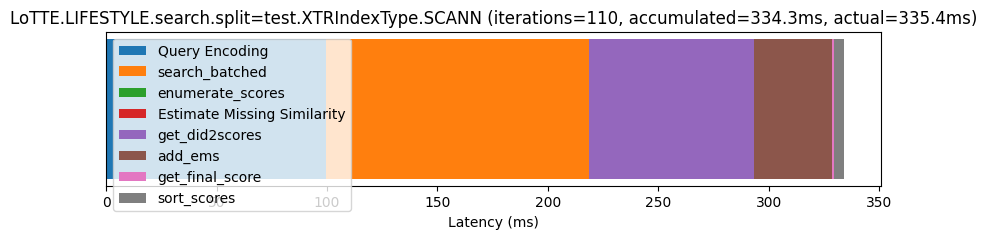

In [8]:
tracker_opt.display()

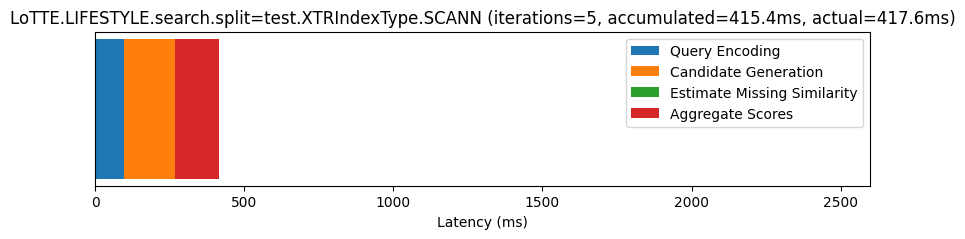

In [8]:
tracker_opt.display_grouped(groups, bound=2600, detailed=False)

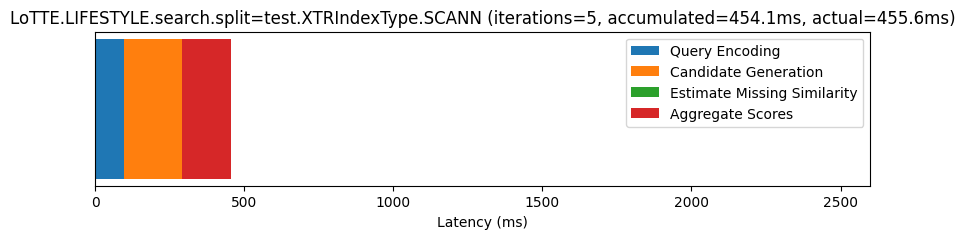

In [9]:
tracker_opt.display_grouped(groups, bound=2600, detailed=False)

In [9]:
dataset = BEIRDataset(dataset=BEIR.SCIFACT, datasplit="test")
index_config = XTRScaNNIndexConfig()
index_name = canonical_index_name(dataset=dataset, index_config=index_config)
config = XTRConfig(index_name=index_name, model=XTRModel.BASE_EN, index_config=index_config, override=False)

xtr_opt = XTROpt(config=config, collection=dataset.collection, device=torch.device("cpu"))

  0%|          | 0/5183 [00:00<?, ?it/s]

#> Preparing corpus for BEIR BEIR.SCIFACT/test


100%|████████████████████████████████████████████████████████████████████████████████████████████| 5183/5183 [00:00<00:00, 653394.18it/s]


Loading existing index from /future/u/scheerer/home/data/xtr-eval/indexes/BEIR.SCIFACT.split=test.XTRIndexType.SCANN.


[libprotobuf WARNING external/com_google_protobuf/src/google/protobuf/text_format.cc:339] Warning parsing text-format research_scann.ScannConfig: 38:5: text format contains deprecated field "min_cluster_size"
100%|██████████████████████████████████████████████████████████████████████████████████████| 1872093/1872093 [00:07<00:00, 257671.83it/s]


In [10]:
tracker_opt = ExecutionTracker(name=index_name, steps=["Query Encoding", "search_batched", "enumerate_scores", "Estimate Missing Similarity",
                                                   "get_did2scores", "add_ems", "get_final_score", "sort_scores"])
rankings_opt = xtr_opt.retrieve_docs(dataset.queries, document_top_k=DOCUMENT_TOP_K, token_top_k=TOKEN_TOP_K, tracker=tracker_opt)

  0%|▎                                                                                                   | 1/300 [00:00<01:16,  3.92it/s]

hi


  1%|▋                                                                                                   | 2/300 [00:00<01:38,  3.03it/s]

hi


  1%|█                                                                                                   | 3/300 [00:00<01:22,  3.61it/s]

hi


  1%|█▎                                                                                                  | 4/300 [00:01<01:16,  3.85it/s]

hi


  2%|█▋                                                                                                  | 5/300 [00:01<01:20,  3.66it/s]

hi


  2%|██                                                                                                  | 6/300 [00:01<01:32,  3.19it/s]

hi


  2%|██▎                                                                                                 | 7/300 [00:02<01:32,  3.18it/s]

hi


  3%|██▋                                                                                                 | 8/300 [00:02<01:29,  3.24it/s]

hi


  3%|███                                                                                                 | 9/300 [00:02<01:19,  3.67it/s]

hi


  3%|███▎                                                                                               | 10/300 [00:02<01:14,  3.90it/s]

hi


  4%|███▋                                                                                               | 11/300 [00:03<01:15,  3.85it/s]

hi


  4%|███▉                                                                                               | 12/300 [00:03<01:25,  3.39it/s]

hi


  4%|████▎                                                                                              | 13/300 [00:03<01:32,  3.09it/s]

hi


  5%|████▌                                                                                              | 14/300 [00:04<01:38,  2.92it/s]

hi


  5%|████▉                                                                                              | 15/300 [00:04<01:30,  3.16it/s]

hi


  5%|█████▎                                                                                             | 16/300 [00:04<01:29,  3.18it/s]

hi


  6%|█████▌                                                                                             | 17/300 [00:05<01:37,  2.91it/s]

hi


  6%|█████▉                                                                                             | 18/300 [00:05<01:31,  3.08it/s]

hi


  6%|██████▎                                                                                            | 19/300 [00:05<01:26,  3.24it/s]

hi


  7%|██████▌                                                                                            | 20/300 [00:06<01:25,  3.28it/s]

hi


  7%|██████▉                                                                                            | 21/300 [00:06<01:26,  3.21it/s]

hi


  7%|███████▎                                                                                           | 22/300 [00:06<01:24,  3.29it/s]

hi


  8%|███████▌                                                                                           | 23/300 [00:06<01:22,  3.35it/s]

hi


  8%|███████▉                                                                                           | 24/300 [00:07<01:28,  3.12it/s]

hi


  8%|████████▎                                                                                          | 25/300 [00:07<01:24,  3.25it/s]

hi


  9%|████████▌                                                                                          | 26/300 [00:07<01:20,  3.40it/s]

hi


  9%|████████▉                                                                                          | 27/300 [00:08<01:16,  3.55it/s]

hi


  9%|█████████▏                                                                                         | 28/300 [00:08<01:14,  3.66it/s]

hi


 10%|█████████▌                                                                                         | 29/300 [00:08<01:09,  3.93it/s]

hi


 10%|█████████▉                                                                                         | 30/300 [00:08<01:19,  3.41it/s]

hi


 10%|██████████▏                                                                                        | 31/300 [00:09<01:15,  3.56it/s]

hi


 11%|██████████▌                                                                                        | 32/300 [00:09<01:15,  3.56it/s]

hi


 11%|██████████▉                                                                                        | 33/300 [00:09<01:23,  3.19it/s]

hi


 11%|███████████▏                                                                                       | 34/300 [00:10<01:29,  2.97it/s]

hi


 12%|███████████▌                                                                                       | 35/300 [00:10<01:33,  2.84it/s]

hi


 12%|███████████▉                                                                                       | 36/300 [00:10<01:20,  3.28it/s]

hi


 12%|████████████▏                                                                                      | 37/300 [00:11<01:14,  3.55it/s]

hi


 13%|████████████▌                                                                                      | 38/300 [00:11<01:19,  3.31it/s]

hi


 13%|████████████▊                                                                                      | 39/300 [00:11<01:10,  3.72it/s]

hi


 13%|█████████████▏                                                                                     | 40/300 [00:12<01:19,  3.29it/s]

hi


 14%|█████████████▌                                                                                     | 41/300 [00:12<01:13,  3.54it/s]

hi


 14%|█████████████▌                                                                                     | 41/300 [00:12<01:18,  3.30it/s]


hi


KeyboardInterrupt: 